In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv('Train_data.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to split data into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to encode categorical columns
def encode_categorical_columns(X):
    le = LabelEncoder()
    categorical_columns = X.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        X[col] = le.fit_transform(X[col].astype(str))
    return X, le

# Function to scale numerical features
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X_scaled

# Function to preprocess the target variable
def preprocess_target(y):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    return y_encoded

# Function to preprocess the dataset (encoding + scaling)
def preprocess_data(X, y):
    X, le = encode_categorical_columns(X)
    X_scaled = scale_features(X)
    y_encoded = preprocess_target(y)
    return X_scaled, y_encoded

# Function to split the data into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Function to create, train, and evaluate KNN model
def train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Main function to run the pipeline
def run_pipeline(X, y, test_size=0.2, random_state=42, n_neighbors=5):
    X_preprocessed, y_preprocessed = preprocess_data(X, y)
    X_train, X_test, y_train, y_test = split_data(X_preprocessed, y_preprocessed, test_size, random_state)
    accuracy = train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors)
    return accuracy

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9924588211946815


In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Replace missing values in numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Replace missing values in categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# A1. Evaluate intraclass spread and interclass distances

# Step 1: Separate the data into normal and attack classes
normal_data = df[df['class'] == 'normal'].select_dtypes(include=[np.number])
attack_data = df[df['class'] != 'normal'].select_dtypes(include=[np.number])

# Step 2: Calculate centroids for each class using numpy.mean()
normal_centroid = np.mean(normal_data.values, axis=0)
attack_centroid = np.mean(attack_data.values, axis=0)

# Step 3: Calculate the spread (standard deviation) for each class using numpy.std()
normal_spread = np.std(normal_data.values, axis=0)
attack_spread = np.std(attack_data.values, axis=0)

# Step 4: Calculate the distance between centroids using numpy.linalg.norm()  to calculate the Euclidean distance:
centroid_distance = np.linalg.norm(normal_centroid - attack_centroid)

# Print results
print("Normal centroid:", normal_centroid)
print("Attack centroid:", attack_centroid)
print("Normal spread:", normal_spread)
print("Attack spread:", attack_spread)
print("Distance between centroids:", centroid_distance)

# Print feature names for reference
print("\nFeature names:")
print(normal_data.columns.tolist())

# Print information about missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())

Normal centroid: [1.77274742e+02 1.13944136e+04 4.40068065e+03 7.43549706e-05
 0.00000000e+00 0.00000000e+00 2.23882817e-01 1.18967953e-03
 7.09049000e-01 4.09101048e-01 2.23064912e-03 2.52806900e-03
 4.62116142e-01 2.37935906e-02 5.94839765e-04 7.73291695e-03
 0.00000000e+00 0.00000000e+00 1.25659900e-02 2.25729050e+01
 2.75382556e+01 1.46761841e-02 1.28195405e-02 4.21280393e-02
 4.31095249e-02 9.68345602e-01 3.00750985e-02 1.24856867e-01
 1.48415273e+02 1.89429995e+02 8.10171016e-01 4.08796193e-02
 1.20663246e-01 2.53424046e-02 1.48940442e-02 7.34924530e-03
 4.45445758e-02 4.25645029e-02]
Attack centroid: [4.51397002e+02 3.91461907e+04 2.45098016e+03 8.51571149e-05
 5.09239547e-02 8.51571149e-05 1.68440773e-01 1.19219961e-03
 3.48292600e-02 2.02673933e-02 7.66414034e-04 0.00000000e+00
 6.72741208e-03 4.34301286e-03 8.51571149e-05 4.25785574e-04
 0.00000000e+00 0.00000000e+00 5.19458401e-03 1.55619348e+02
 2.78825683e+01 5.97465724e-01 5.94067104e-01 2.06246274e-01
 2.08619603e-01 3.0

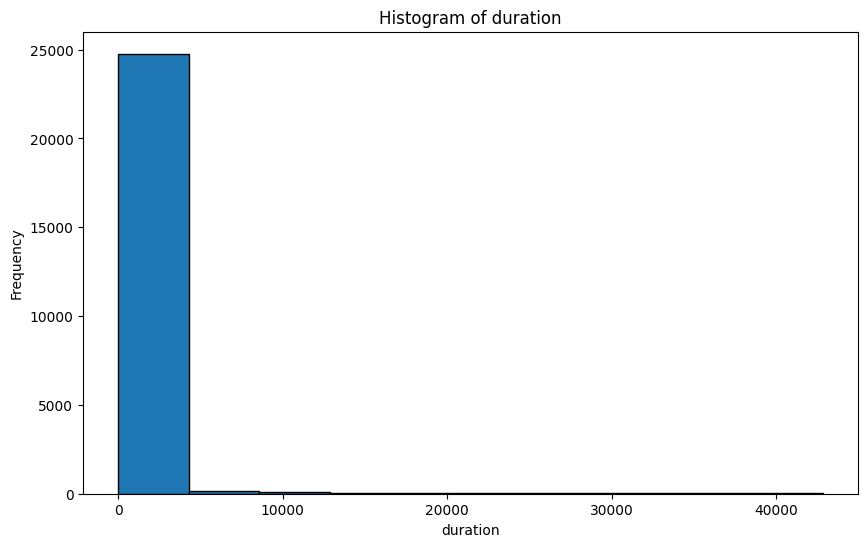

Mean duration: 305.05410447761193
Variance of duration: 7217581.207147616

Histogram data:
Counts: [24633    86    48    62    38    31    42    21    27    28    12    13
    16     3     7    13     2     3    12     5     1    10    11     0
     2    12    16    14    14    10]
Bin edges: [    0.          1428.73333333  2857.46666667  4286.2
  5714.93333333  7143.66666667  8572.4        10001.13333333
 11429.86666667 12858.6        14287.33333333 15716.06666667
 17144.8        18573.53333333 20002.26666667 21431.
 22859.73333333 24288.46666667 25717.2        27145.93333333
 28574.66666667 30003.4        31432.13333333 32860.86666667
 34289.6        35718.33333333 37147.06666667 38575.8
 40004.53333333 41433.26666667 42862.        ]


In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


feature = 'duration'

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df[feature], bins=10, edgecolor='black')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean_value = df[feature].mean()
var_value = df[feature].var()

print(f"Mean {feature}: {mean_value}")
print(f"Variance of {feature}: {var_value}")

# If you want to use numpy.histogram() as suggested:
hist, bin_edges = np.histogram(df[feature], bins=30)

print("\nHistogram data:")
print("Counts:", hist)
print("Bin edges:", bin_edges)

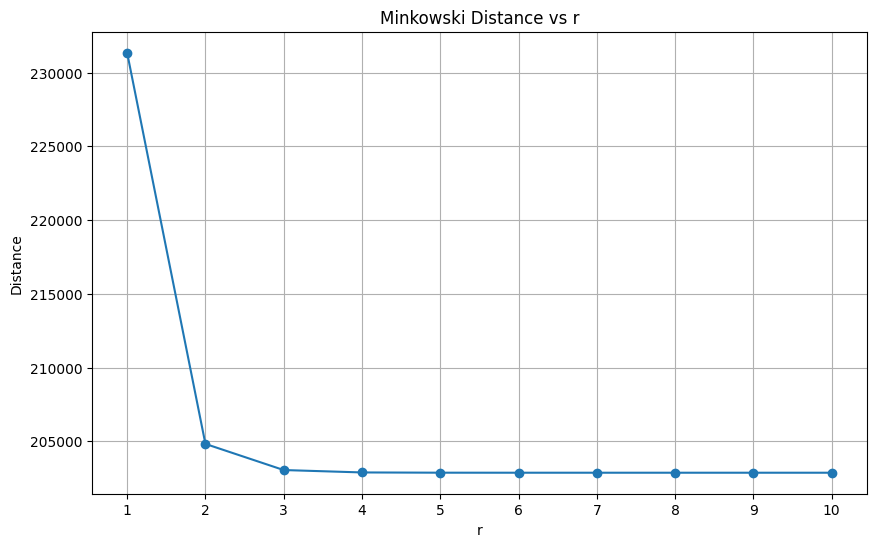

r = 1: distance = 231351.9200
r = 2: distance = 204818.0876
r = 3: distance = 203045.9430
r = 4: distance = 202882.9993
r = 5: distance = 202866.1149
r = 6: distance = 202864.2452
r = 7: distance = 202864.0292
r = 8: distance = 202864.0036
r = 9: distance = 202864.0004
r = 10: distance = 202864.0001

Feature Vector 1:
duration                          0.0
src_bytes                      1032.0
dst_bytes                         0.0
land                              0.0
wrong_fragment                    0.0
urgent                            0.0
hot                               0.0
num_failed_logins                 0.0
logged_in                         0.0
num_compromised                   0.0
root_shell                        0.0
su_attempted                      0.0
num_root                          0.0
num_file_creations                0.0
num_shells                        0.0
num_access_files                  0.0
num_outbound_cmds                 0.0
is_host_login                     

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Assuming df is already loaded
# If not, uncomment the following line and provide the correct path
# df = pd.read_csv('path_to_your_dataset.csv')

# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Randomly select two samples
sample1 = numeric_df.sample(n=1, random_state=42).iloc[0]
sample2 = numeric_df.sample(n=1, random_state=43).iloc[0]

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [minkowski(sample1, sample2, p=r) for r in r_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

# Print the distances
for r, dist in zip(r_values, distances):
    print(f"r = {r}: distance = {dist:.4f}")

# Print the feature vectors
print("\nFeature Vector 1:")
print(sample1)
print("\nFeature Vector 2:")
print(sample2)

In [15]:
import pandas as pd
import numpy as np

# Check unique classes
print("Original classes:")
print(df['class'].value_counts())

# Select two classes
normal_class = 'normal'
attack_class = 'anomaly'  # Change this if you want to use a different attack class

# Create a new dataframe with only these two classes
df_binary = df[df['class'].isin([normal_class, attack_class])]

# Verify the new class distribution
print("\nNew binary classes:")
print(df_binary['class'].value_counts())

# If you want to combine all non-normal classes into a single 'attack' class, use this instead:
# df_binary = df.copy()
# df_binary['class'] = df_binary['class'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

# Separate features and target
X = df_binary.drop('class', axis=1)
y = df_binary['class']

# Now X and y are ready for further processing and model training

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Optional: Display first few rows of the new dataset
print("\nFirst few rows of the new dataset:")
print(df_binary.head())

Original classes:
class
normal     13449
anomaly    11743
Name: count, dtype: int64

New binary classes:
class
normal     13449
anomaly    11743
Name: count, dtype: int64

Shape of X: (25192, 41)
Shape of y: (25192,)

First few rows of the new dataset:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0       0.0           tcp  ftp_data   SF      491.0        0.0   0.0   
1       0.0           udp     other   SF      146.0        0.0   0.0   
2       0.0           tcp   private   S0        0.0        0.0   0.0   
3       0.0           tcp      http   SF      232.0     8153.0   0.0   
4       0.0           tcp      http   SF      199.0      420.0   0.0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                25.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                26.0   
3             0.0     0.0  0.0  ...               255.0   
4             0.0  

This code does the following:
Displays the original class distribution in your dataset.

Selects two classes: 'normal' and 'anomaly' (you can change 'anomaly' to any other attack class if needed).

Creates a new dataframe df_binary with only these two classes.

Verifies the new class distribution.
Separates the features (X) and target (y) for further processing.

Alternative approach:
If your project would benefit from combining all types of attacks into a single 'attack' class (making it a binary classification problem), you can use the commented-out code that applies a lambda function to create this binary classification.

Key points:
Make sure to choose appropriate classes for your specific problem. The code assumes 'normal' and 'anomaly', but you should adjust these based on your actual data.

After this step, your dataset will only contain two classes, making it suitable for binary classification tasks.
The shapes of X and y will give you an idea of how many samples and features you have in your reduced dataset.

This step is crucial for focusing your analysis on a binary classification problem, which is often easier to start with and can provide valuable insights before potentially expanding to multi-class classification.


In [16]:
"""A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code
for help:
>>> import numpy as np
>>> from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y)"""
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df_binary is your dataframe with two classes from the previous step
# If not, make sure to run the code from the previous answer first

# Separate features and target
X = df_binary.drop('class', axis=1)
y = df_binary['class']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and kNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=3))])

# Fit the pipeline
knn_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
"""A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for
help.
>>> neigh.score(X_test, y_test)"""
# Calculate accuracy on the test set
# Print the model's accuracy
print(f"\nAccuracy: {knn_pipeline.score(X_test, y_test):.4f}")

Classification Report:
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2365
      normal       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039


Confusion Matrix:
[[2355   10]
 [  10 2664]]

Accuracy: 0.9960


In [29]:
"""A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.
>>> neigh.predict(X_test)
Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the
class of the test vector (test_vect is any feature vector from your test set). """
# Part 1: Predicting for the entire test set
y_pred = knn_pipeline.predict(X_test)

# Print the first few predictions and their corresponding true labels
print("Predictions for the first 10 test instances:")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

# Part 2: Predicting for a single test vector
# Let's choose the first test vector as an example
single_test_vector = X_test.iloc[0:1]  # Using iloc to get the first row as a DataFrame
single_prediction = knn_pipeline.predict(single_test_vector)

print("\nPrediction for a single test vector:")
print(f"Predicted class: {single_prediction[0]}")
print(f"Actual class: {y_test.iloc[0]}")

# Optional: Display the feature values of the single test vector
print("\nFeature values of the test vector:")
print(single_test_vector)

Predictions for the first 10 test instances:
Predicted: anomaly, Actual: anomaly
Predicted: normal, Actual: normal
Predicted: anomaly, Actual: anomaly
Predicted: normal, Actual: normal
Predicted: anomaly, Actual: anomaly
Predicted: normal, Actual: normal
Predicted: normal, Actual: normal
Predicted: normal, Actual: normal
Predicted: normal, Actual: normal
Predicted: anomaly, Actual: anomaly

Prediction for a single test vector:
Predicted class: anomaly
Actual class: anomaly

Feature values of the test vector:
       duration protocol_type service flag  src_bytes  dst_bytes  land  \
19064       0.0          icmp   ecr_i   SF     1032.0        0.0   0.0   

       wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
19064             0.0     0.0  0.0  ...           255.0               255.0   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
19064                     1.0                     0.0   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate

NN (k=1) Accuracy: 0.9956
kNN (k=3) Accuracy: 0.9960


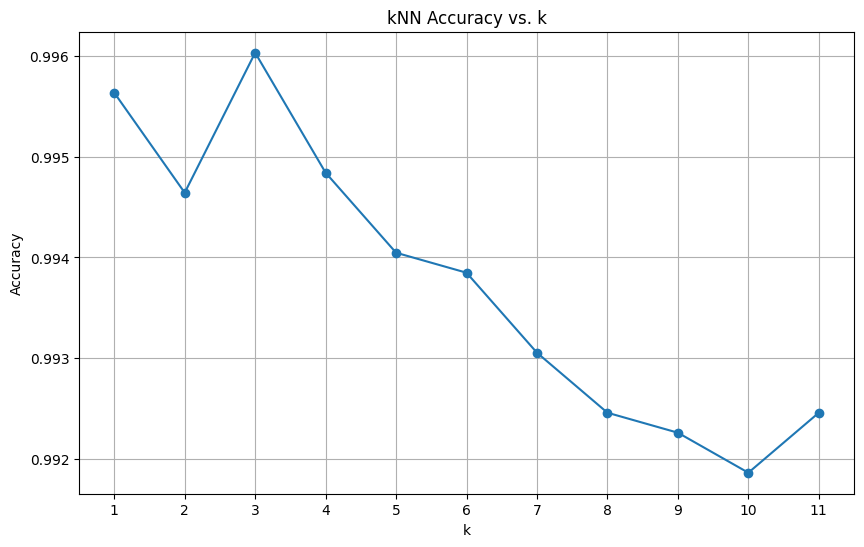

k = 1: Accuracy = 0.9956
k = 2: Accuracy = 0.9946
k = 3: Accuracy = 0.9960
k = 4: Accuracy = 0.9948
k = 5: Accuracy = 0.9940
k = 6: Accuracy = 0.9938
k = 7: Accuracy = 0.9931
k = 8: Accuracy = 0.9925
k = 9: Accuracy = 0.9923
k = 10: Accuracy = 0.9919
k = 11: Accuracy = 0.9925


In [30]:
"""A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot. """
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming df_binary is your dataframe with two classes from the previous steps

# Separate features and target
X = df_binary.drop('class', axis=1)
y = df_binary['class']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to create and evaluate kNN model
def evaluate_knn(k):
    knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', KNeighborsClassifier(n_neighbors=k))])
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluate NN (k=1) and kNN (k=3)
nn_accuracy = evaluate_knn(1)
knn_accuracy = evaluate_knn(3)

print(f"NN (k=1) Accuracy: {nn_accuracy:.4f}")
print(f"kNN (k=3) Accuracy: {knn_accuracy:.4f}")

# Evaluate for k from 1 to 11
k_values = range(1, 12)
accuracies = [evaluate_knn(k) for k in k_values]

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print accuracies for each k
for k, acc in zip(k_values, accuracies):
    print(f"k = {k}: Accuracy = {acc:.4f}")

In [31]:
"""A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit). """
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Assuming df_binary is your dataframe with two classes

# Separate features and target
X = df_binary.drop('class', axis=1)
y = df_binary['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the model (using k=3 as it was the best performer)
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=3))])
knn_pipeline.fit(X_train, y_train)

# Function to evaluate model
def evaluate_model(X, y, dataset_name):
    y_pred = knn_pipeline.predict(X)
    cm = confusion_matrix(y, y_pred)
    cr = classification_report(y, y_pred, output_dict=True)

    print(f"Confusion Matrix ({dataset_name}):")
    print(cm)
    print(f"\nClassification Report ({dataset_name}):")
    for class_name, metrics in cr.items():
        if isinstance(metrics, dict):
            print(f"{class_name}:")
            print(f"  Precision: {metrics['precision']:.4f}")
            print(f"  Recall: {metrics['recall']:.4f}")
            print(f"  F1-Score: {metrics['f1-score']:.4f}")
    print(f"Accuracy: {cr['accuracy']:.4f}")
    print("\n")

# Evaluate on training data
evaluate_model(X_train, y_train, "Training Data")

# Evaluate on test data
evaluate_model(X_test, y_test, "Test Data")

Confusion Matrix (Training Data):
[[ 9336    42]
 [   25 10750]]

Classification Report (Training Data):
anomaly:
  Precision: 0.9973
  Recall: 0.9955
  F1-Score: 0.9964
normal:
  Precision: 0.9961
  Recall: 0.9977
  F1-Score: 0.9969
macro avg:
  Precision: 0.9967
  Recall: 0.9966
  F1-Score: 0.9967
weighted avg:
  Precision: 0.9967
  Recall: 0.9967
  F1-Score: 0.9967
Accuracy: 0.9967


Confusion Matrix (Test Data):
[[2355   10]
 [  10 2664]]

Classification Report (Test Data):
anomaly:
  Precision: 0.9958
  Recall: 0.9958
  F1-Score: 0.9958
normal:
  Precision: 0.9963
  Recall: 0.9963
  F1-Score: 0.9963
macro avg:
  Precision: 0.9960
  Recall: 0.9960
  F1-Score: 0.9960
weighted avg:
  Precision: 0.9960
  Recall: 0.9960
  F1-Score: 0.9960
Accuracy: 0.9960


